<a href="https://colab.research.google.com/github/ever-oli/MLby22/blob/main/linear_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Gradient Descent...

Epoch    0 | MSE Loss: 442.8819 | m: 2.3019, b: 0.3821
Epoch  100 | MSE Loss: 7.3528 | m: 3.3212, b: 2.7001
Epoch  200 | MSE Loss: 5.8011 | m: 3.1351, b: 3.9107
Epoch  300 | MSE Loss: 5.2910 | m: 3.0284, b: 4.6048
Epoch  400 | MSE Loss: 5.1233 | m: 2.9673, b: 5.0028
Epoch  500 | MSE Loss: 5.0682 | m: 2.9322, b: 5.2310
Epoch  600 | MSE Loss: 5.0500 | m: 2.9121, b: 5.3619
Epoch  700 | MSE Loss: 5.0441 | m: 2.9006, b: 5.4369
Epoch  800 | MSE Loss: 5.0421 | m: 2.8939, b: 5.4799
Epoch  900 | MSE Loss: 5.0415 | m: 2.8902, b: 5.5046
Epoch  999 | MSE Loss: 5.0413 | m: 2.8880, b: 5.5186

Training Complete.
Target parameters : m = 3.0, b = 5.0
Learned parameters: m = 2.8880, b = 5.5186



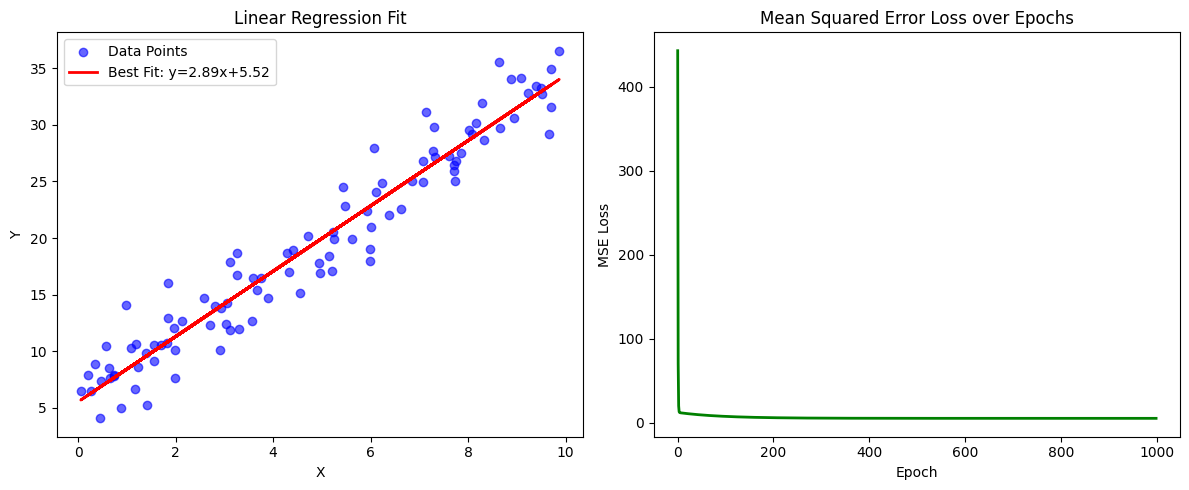

In [1]:

# LINEAR REGRESSION FROM SCRATCH USING NUMPY


import numpy as np
import matplotlib.pyplot as plt


# 1. Generate Sample Data

np.random.seed(42)
N = 100 # Number of data points

# Create random x values between 0 and 10
X = 10 * np.random.rand(N)

# Create y values based on a true line (y = 3x + 5) plus some Gaussian noise
true_m = 3.0
true_b = 5.0
noise = np.random.randn(N) * 2.5
Y = true_m * X + true_b + noise


# 2. Initialize Parameters and Hyperparameters

m = 0.0  # Initial weight (slope)
b = 0.0  # Initial bias (intercept)

learning_rate = 0.01
epochs = 1000

# To track the loss over time
loss_history = []

print("Starting Gradient Descent...\n")


# 3. Training Loop (Gradient Descent)

for epoch in range(epochs):
    # Step 1: Forward pass (Calculate predictions)
    Y_pred = m * X + b

    # Step 2: Calculate the error
    error = Y - Y_pred

    # Step 3: Calculate the Loss (Mean Squared Error)
    mse = (1/N) * np.sum(error**2)
    loss_history.append(mse)

    # Step 4: Calculate Gradients
    # Note: we use negative sign here because we defined error as (Y_actual - Y_pred)
    # which absorbs the negative sign from the derivative formula.
    dm = -(2/N) * np.sum(X * error)
    db = -(2/N) * np.sum(error)

    # Step 5: Update Parameters
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # Print progress every 100 epochs
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:4d} | MSE Loss: {mse:.4f} | m: {m:.4f}, b: {b:.4f}")

print("\nTraining Complete.")
print(f"Target parameters : m = {true_m}, b = {true_b}")
print(f"Learned parameters: m = {m:.4f}, b = {b:.4f}\n")


# 4. Visualization

# Plot 1: The Dataset and the Line of Best Fit
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X, m * X + b, color='red', linewidth=2, label=f'Best Fit: y={m:.2f}x+{b:.2f}')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot 2: The Loss Curve
plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss_history, color='green', linewidth=2)
plt.title('Mean Squared Error Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')

plt.tight_layout()
plt.show()